In [8]:
# ============================================================
# RUN HOWARD ITERATION AND PLOT POLICY FUNCTIONS
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from utilities import tauchen
from howards import howard_iteration  # <-- uses your existing functions

# ============================================================
# SETUP
# ============================================================

# Model parameters
beta, R, rho = 0.95, 1.05, 2.0

# Wealth grid
N_w = 250
w_grid = np.linspace(0.0, 250, N_w)

# Income process via Tauchen
y_grid, Pi = tauchen(mu=30, phi=0.7, sigma=10, n_states=15, m=4)
N_y = len(y_grid)

print(f"Income grid: min={y_grid.min():.1f}, max={y_grid.max():.1f}")
print(f"Transition matrix: {Pi.shape}, rows sum to {Pi.sum(axis=1).mean():.3f}")

# ============================================================
# RUN HOWARD ITERATION
# ============================================================

a_prime, V = howard_iteration(w_grid, y_grid, Pi, beta, R, rho,
                              max_iter=50, tol=1e-6)

# ============================================================
# RECOVER CONSUMPTION AND SAVINGS FUNCTIONS
# ============================================================

# c(w,s) = w - a'(w,s)/R
c_policy = w_grid.reshape(-1,1) - a_prime / R

# savings = a'(w,s)
s_policy = a_prime


Income grid: min=44.0, max=156.0
Transition matrix: (15, 15), rows sum to 1.000

Howard's Algorithm: N_w=250, N_y=15, β=0.95, R=1.05, ρ=2.0
Iter  1: ||Δa'|| = 9.73e+01
Iter  2: ||Δa'|| = 4.42e+01
Iter  3: ||Δa'|| = 2.46e+01
Iter  4: ||Δa'|| = 1.40e+01
Iter  5: ||Δa'|| = 7.54e+00
Iter  6: ||Δa'|| = 2.84e+00
Iter  7: ||Δa'|| = 9.47e-01
Iter  8: ||Δa'|| = 1.25e-01
Iter  9: ||Δa'|| = 1.46e-03
Iter 10: ||Δa'|| = 1.88e-05
Iter 11: ||Δa'|| = 1.60e-05
Iter 12: ||Δa'|| = 1.65e-05
Iter 13: ||Δa'|| = 1.52e-05
Iter 14: ||Δa'|| = 1.92e-05
Iter 15: ||Δa'|| = 1.69e-05
Iter 16: ||Δa'|| = 1.85e-05
Iter 17: ||Δa'|| = 1.58e-05
Iter 18: ||Δa'|| = 1.73e-05
Iter 19: ||Δa'|| = 1.59e-05
Iter 20: ||Δa'|| = 1.50e-05
Iter 21: ||Δa'|| = 1.42e-05
Iter 22: ||Δa'|| = 1.45e-05
Iter 23: ||Δa'|| = 1.63e-05
Iter 24: ||Δa'|| = 1.56e-05
Iter 25: ||Δa'|| = 1.51e-05
Iter 26: ||Δa'|| = 1.51e-05
Iter 27: ||Δa'|| = 2.01e-05
Iter 28: ||Δa'|| = 1.87e-05
Iter 29: ||Δa'|| = 1.57e-05
Iter 30: ||Δa'|| = 1.56e-05
Iter 31: ||Δa'|| = 1

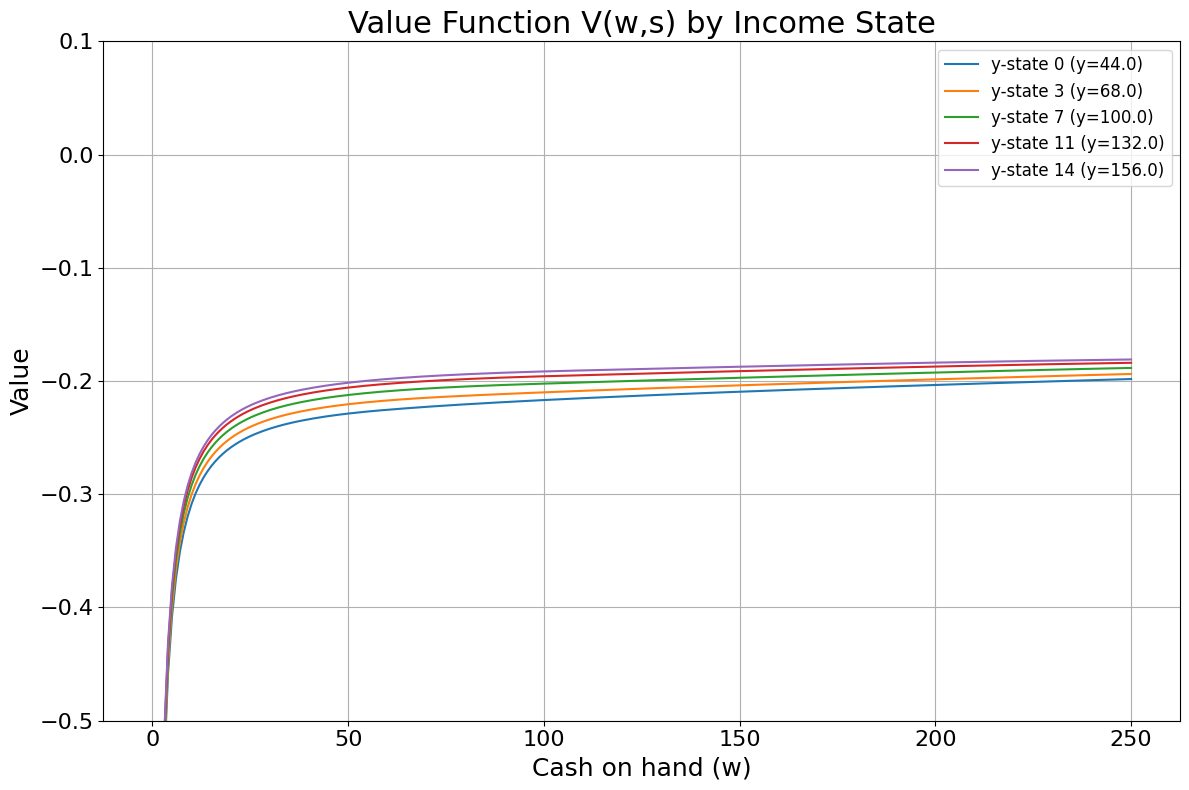

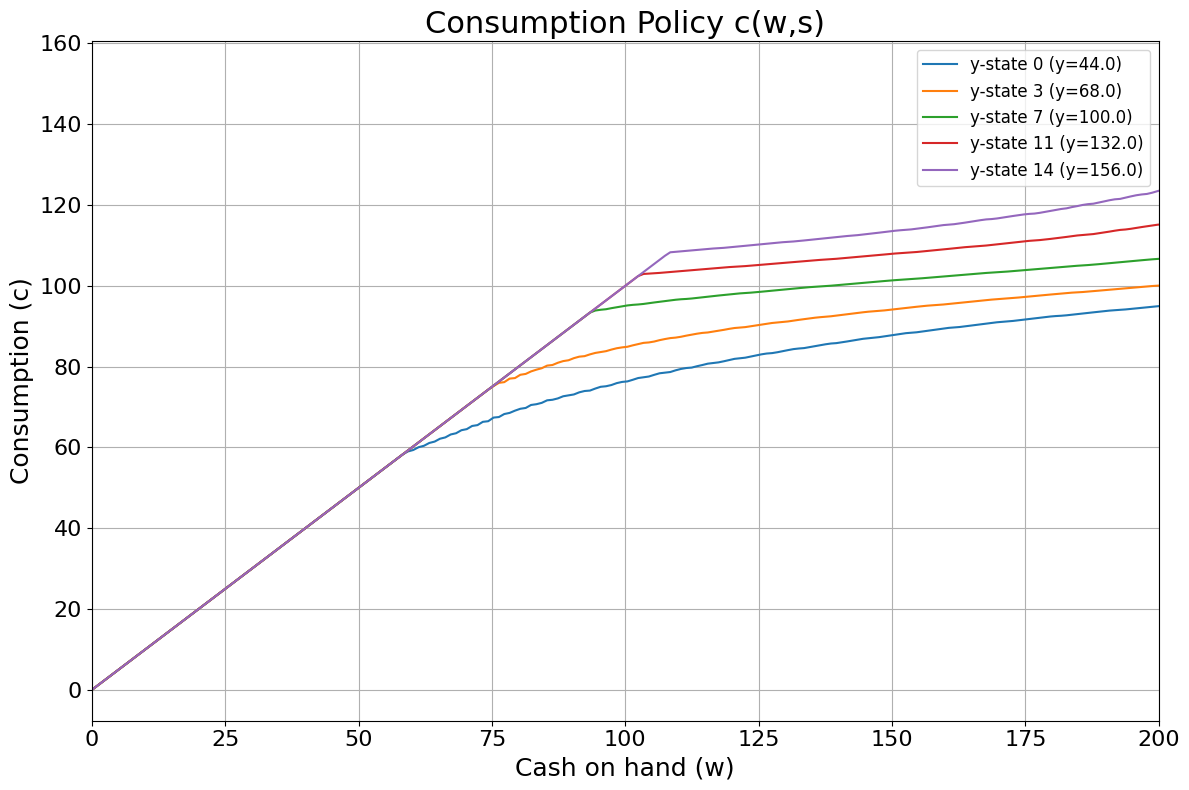

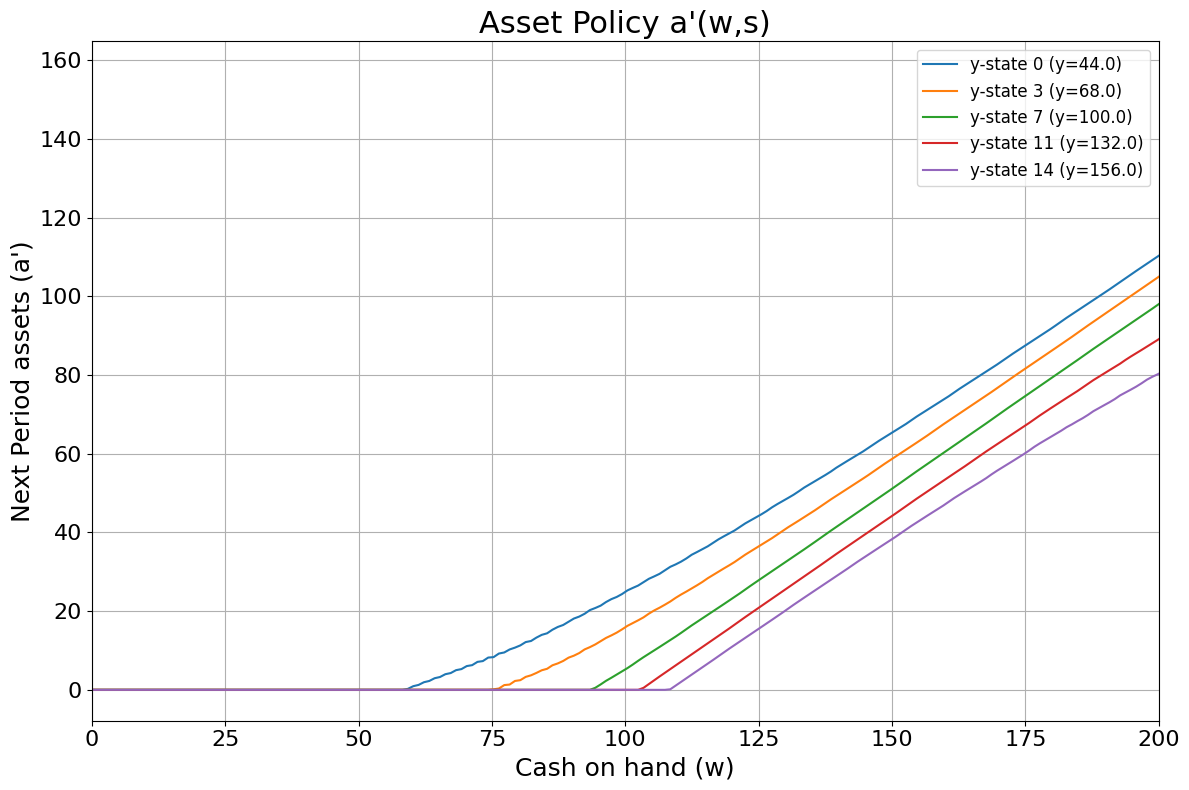

In [15]:
# ============================================================
# PLOTTING
# ============================================================
# Set your figure path
output_path = "C:/Users/yash2/OneDrive/Desktop/phd_classes/macro_1/consumption_savings/output"


# Choose representative income states
idxs = [0, N_y//4, N_y//2, 3*N_y//4, N_y-1]
labels = [f"y-state {i} (y={y_grid[i]:.1f})" for i in idxs]

# ------------------------------------------------------------
# Plot Value Functions
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
for i, lab in zip(idxs, labels):
    plt.plot(w_grid, V[:, i], label=lab)

plt.title("Value Function V(w,s) by Income State", fontsize = 22)
plt.xlabel("Cash on hand (w)", fontsize = 18)
plt.ylabel("Value", fontsize = 18)
plt.ylim(-.5, .1)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(f"{output_path}/figures/fig_v_by_income.pdf", dpi=600)
plt.show()

# ------------------------------------------------------------
# Plot Consumption Policies
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
for i, lab in zip(idxs, labels):
    plt.plot(w_grid, c_policy[:, i], label=lab)

plt.title("Consumption Policy c(w,s)", fontsize = 22)
plt.xlabel("Cash on hand (w)", fontsize = 18)
plt.ylabel("Consumption (c)", fontsize = 18)
plt.xlim(0,200)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f"{output_path}/figures/fig_c_by_income.pdf", dpi=600)
plt.show()

# ------------------------------------------------------------
# Plot Savings Policies
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
for i, lab in zip(idxs, labels):
    plt.plot(w_grid, s_policy[:, i], label=lab)

plt.title("Asset Policy a'(w,s)", fontsize = 22)
plt.xlabel("Cash on hand (w)", fontsize = 18)
plt.ylabel("Next Period assets (a')", fontsize = 18)
plt.xlim(0,200)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f"{output_path}/figures/fig_s_by_income.pdf", dpi=600)
plt.show()


In [16]:
# ============================================================
# RUN HOWARD ITERATION AND PLOT POLICY FUNCTIONS
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from utilities import tauchen
from howards import howard_iteration  # <-- uses your existing functions

# ============================================================
# SETUP
# ============================================================

# Model parameters
beta, R, rho = 0.95, 1.05, 2.0

# Wealth grid
N_w = 250
w_grid = np.linspace(0.0, 250, N_w)

# Income process via Tauchen
y_grid, Pi = tauchen(mu=30, phi=0.0, sigma=10, n_states=15, m=4)
N_y = len(y_grid)

print(f"Income grid: min={y_grid.min():.1f}, max={y_grid.max():.1f}")
print(f"Transition matrix: {Pi.shape}, rows sum to {Pi.sum(axis=1).mean():.3f}")

# ============================================================
# RUN HOWARD ITERATION
# ============================================================

a_prime, V = howard_iteration(w_grid, y_grid, Pi, beta, R, rho,
                              max_iter=50, tol=1e-6)

# ============================================================
# RECOVER CONSUMPTION AND SAVINGS FUNCTIONS
# ============================================================

# c(w,s) = w - a'(w,s)/R
c_policy = w_grid.reshape(-1,1) - a_prime / R

# savings = a'(w,s)
s_policy = a_prime


Income grid: min=-10.0, max=70.0
Transition matrix: (15, 15), rows sum to 1.000

Howard's Algorithm: N_w=250, N_y=15, β=0.95, R=1.05, ρ=2.0
Iter  1: ||Δa'|| = 1.13e+02
Iter  2: ||Δa'|| = 1.41e+02
Iter  3: ||Δa'|| = 3.05e+01
Iter  4: ||Δa'|| = 6.02e+01
Iter  5: ||Δa'|| = 5.39e+01
Iter  6: ||Δa'|| = 3.10e+01
Iter  7: ||Δa'|| = 1.64e+01
Iter  8: ||Δa'|| = 1.48e+01
Iter  9: ||Δa'|| = 2.63e+00
Iter 10: ||Δa'|| = 9.37e-01
Iter 11: ||Δa'|| = 2.08e-01
Iter 12: ||Δa'|| = 9.65e-03
Iter 13: ||Δa'|| = 1.67e-05
Iter 14: ||Δa'|| = 6.23e-06
Iter 15: ||Δa'|| = 6.39e-06
Iter 16: ||Δa'|| = 6.39e-06
Iter 17: ||Δa'|| = 6.32e-06
Iter 18: ||Δa'|| = 5.47e-06
Iter 19: ||Δa'|| = 5.40e-06
Iter 20: ||Δa'|| = 6.48e-06
Iter 21: ||Δa'|| = 6.62e-06
Iter 22: ||Δa'|| = 6.58e-06
Iter 23: ||Δa'|| = 6.48e-06
Iter 24: ||Δa'|| = 6.23e-06
Iter 25: ||Δa'|| = 6.28e-06
Iter 26: ||Δa'|| = 6.39e-06
Iter 27: ||Δa'|| = 6.39e-06
Iter 28: ||Δa'|| = 6.23e-06
Iter 29: ||Δa'|| = 5.81e-06
Iter 30: ||Δa'|| = 5.79e-06
Iter 31: ||Δa'|| = 6

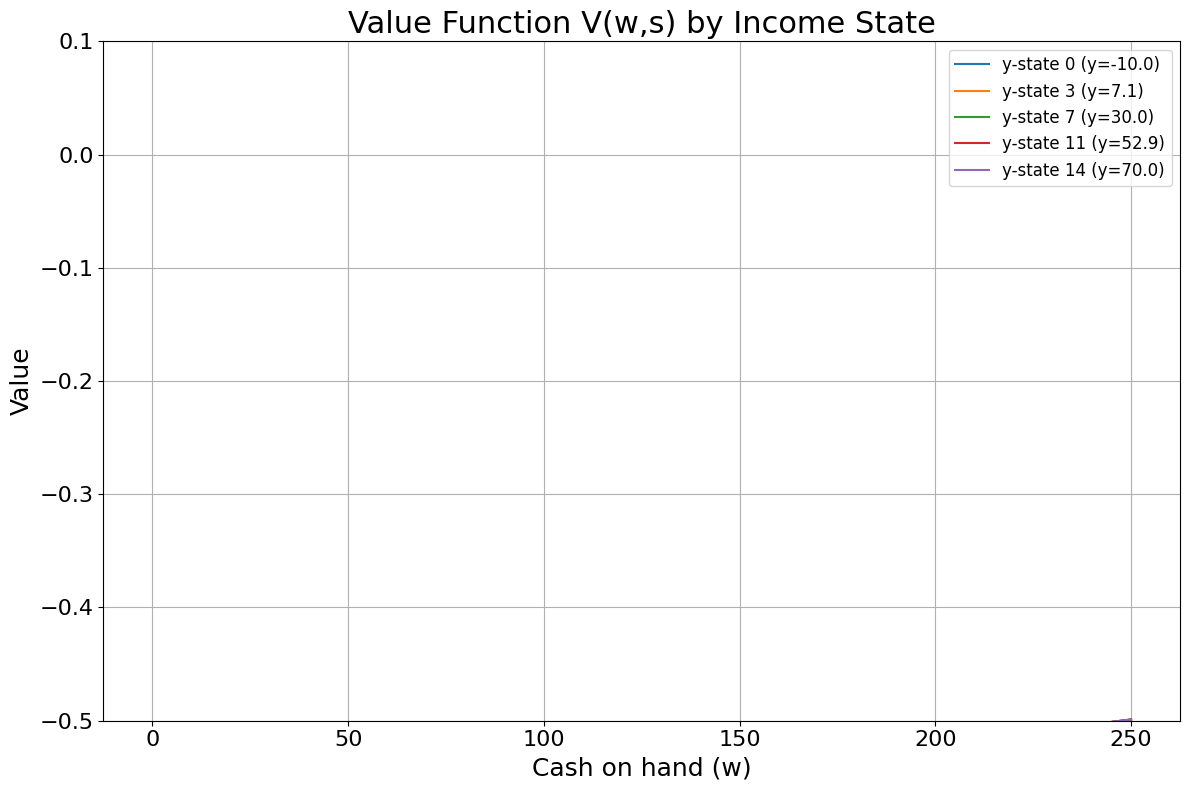

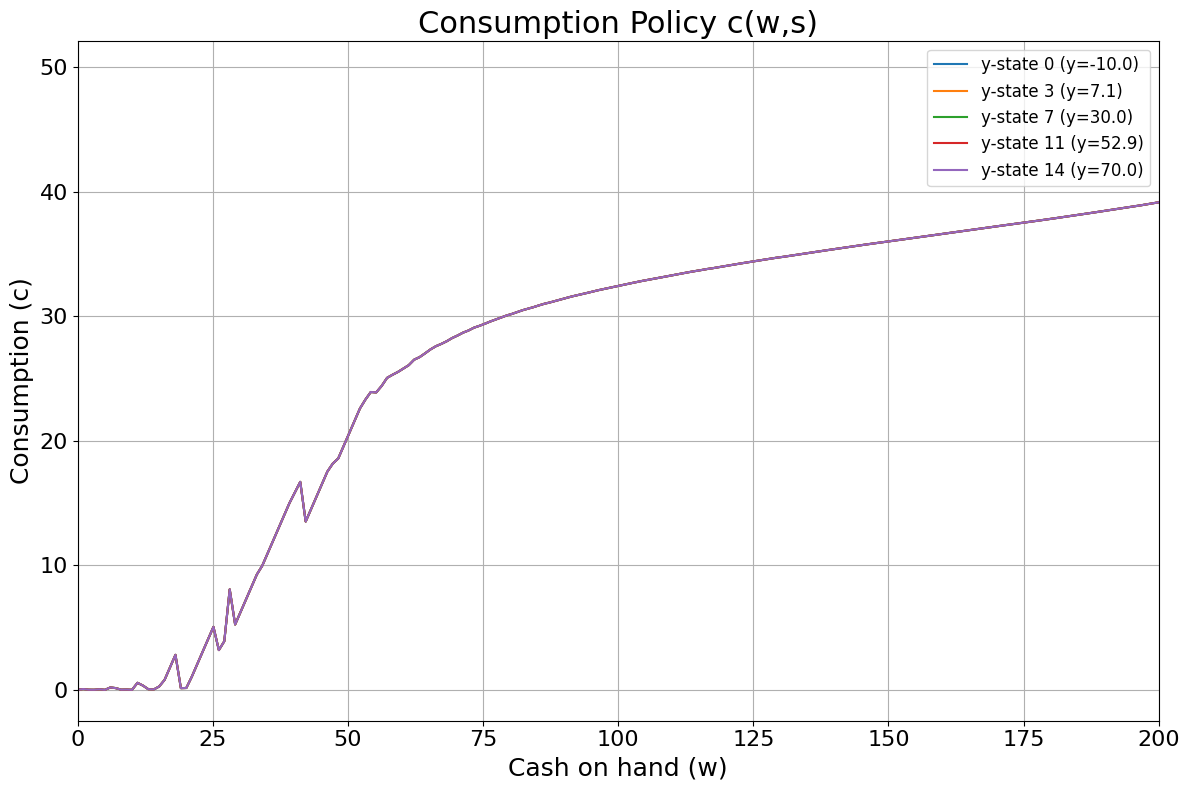

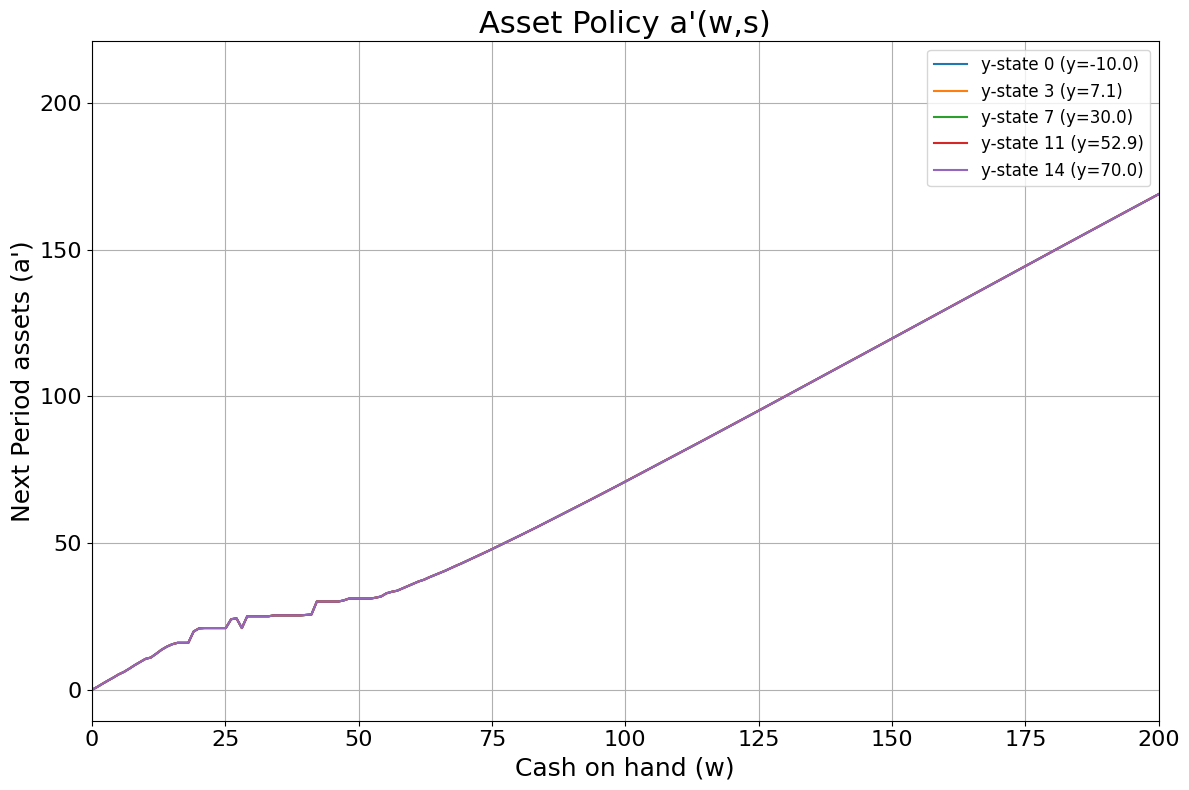

In [17]:
# ============================================================
# PLOTTING
# ============================================================
# Set your figure path
output_path = "C:/Users/yash2/OneDrive/Desktop/phd_classes/macro_1/consumption_savings/output"


# Choose representative income states
idxs = [0, N_y//4, N_y//2, 3*N_y//4, N_y-1]
labels = [f"y-state {i} (y={y_grid[i]:.1f})" for i in idxs]

# ------------------------------------------------------------
# Plot Value Functions
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
for i, lab in zip(idxs, labels):
    plt.plot(w_grid, V[:, i], label=lab)

plt.title("Value Function V(w,s) by Income State", fontsize = 22)
plt.xlabel("Cash on hand (w)", fontsize = 18)
plt.ylabel("Value", fontsize = 18)
plt.ylim(-.5, .1)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
#plt.savefig(f"{output_path}/figures/fig_v_by_income.pdf", dpi=600)
plt.show()

# ------------------------------------------------------------
# Plot Consumption Policies
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
for i, lab in zip(idxs, labels):
    plt.plot(w_grid, c_policy[:, i], label=lab)

plt.title("Consumption Policy c(w,s)", fontsize = 22)
plt.xlabel("Cash on hand (w)", fontsize = 18)
plt.ylabel("Consumption (c)", fontsize = 18)
plt.xlim(0,200)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig(f"{output_path}/figures/fig_c_by_income.pdf", dpi=600)
plt.show()

# ------------------------------------------------------------
# Plot Savings Policies
# ------------------------------------------------------------
plt.figure(figsize=(12,8))
for i, lab in zip(idxs, labels):
    plt.plot(w_grid, s_policy[:, i], label=lab)

plt.title("Asset Policy a'(w,s)", fontsize = 22)
plt.xlabel("Cash on hand (w)", fontsize = 18)
plt.ylabel("Next Period assets (a')", fontsize = 18)
plt.xlim(0,200)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig(f"{output_path}/figures/fig_s_by_income.pdf", dpi=600)
plt.show()
